In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [34]:
x,y = make_classification(n_features=5 , n_redundant=0, n_informative= 5, n_clusters_per_class=1)

In [35]:
df  = pd.DataFrame(x, columns=["col1", "col2", 'col3', "col4", 'col5'])
df["target"] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.291191,0.286008,-0.438572,1.385082,-1.659192,0
1,3.862906,1.945907,-1.699024,3.221425,-0.600139,0
2,-2.086321,-0.375791,0.794862,-0.516626,0.483030,1
3,-0.666053,0.301719,0.710181,-0.884573,-0.119562,0
4,-2.047040,-4.604072,3.232539,-3.553055,-4.332251,1


In [36]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [37]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [38]:
# function for combined sampling 
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [39]:
import random

df1 = combined_sampling(df,0.5,0.5)

C:\Users\BIIT\AppData\Local\Temp\ipykernel_9312\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [40]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\BIIT\AppData\Local\Temp\ipykernel_9312\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [41]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\BIIT\AppData\Local\Temp\ipykernel_9312\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [42]:

print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col3', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')


In [43]:
df3

,col5,col1,target
67,-1.227282,-0.675933,0
65,1.209485,-0.909619,1
5,-2.765135,-2.063285,1
72,-1.801456,1.469201,1
39,-0.398470,-0.622450,1
54,0.009173,2.387191,0
91,-1.717455,-0.367919,0
50,-0.580184,3.077694,0
2,0.483030,-2.086321,1
27,0.231065,1.736824,0


In [44]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()
     

In [45]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])
     

DecisionTreeClassifier()

In [46]:
from sklearn.tree import plot_tree

[Text(0.375, 0.9, 'x[0] <= -0.351\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.5, 0.7, 'x[1] <= 0.172\ngini = 0.185\nsamples = 29\nvalue = [26, 3]'),
 Text(0.25, 0.5, 'x[0] <= 1.467\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.375, 0.3, 'x[0] <= 1.603\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.75, 0.5, 'x[0] <= 0.533\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

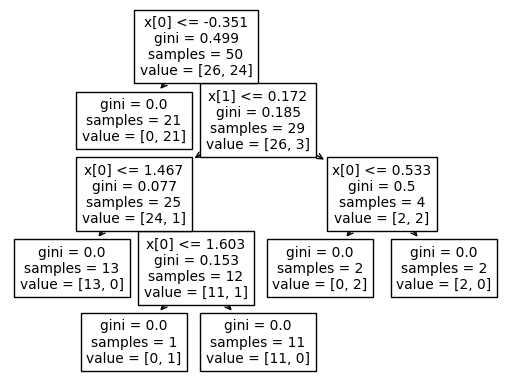

In [47]:
plot_tree(clf1)

[Text(0.3333333333333333, 0.9, 'x[0] <= -0.497\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.4444444444444444, 0.7, 'x[0] <= -0.011\ngini = 0.17\nsamples = 32\nvalue = [29, 3]'),
 Text(0.2222222222222222, 0.5, 'x[1] <= -0.01\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.3, 'x[1] <= 1.244\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.5, 'x[1] <= -0.159\ngini = 0.071\nsamples = 27\nvalue = [26, 1]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.7777777777777778, 0.3, 'x[1] <= -0.115\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nval

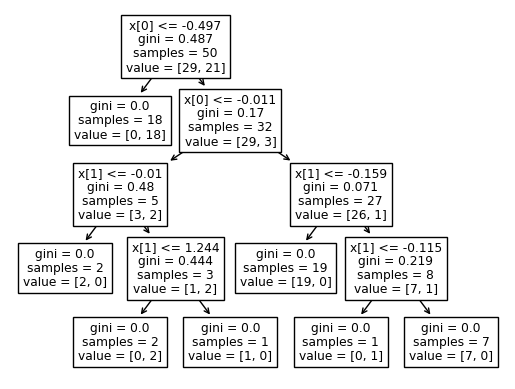

In [48]:
plot_tree(clf2)
     

[Text(0.6071428571428571, 0.9, 'x[1] <= -0.163\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.35714285714285715, 0.7, 'x[1] <= -0.729\ngini = 0.293\nsamples = 28\nvalue = [5, 23]'),
 Text(0.21428571428571427, 0.5, 'x[0] <= -3.472\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.14285714285714285, 0.3, 'x[1] <= -1.465\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07142857142857142, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21428571428571427, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.5, 0.5, 'x[0] <= -0.941\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8571428571428571, 0.7, 'x[0] <= -1.782\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.7857142857142857, 0.5, 'x[1] <= 1.286\ngini = 0.375\nsamples 

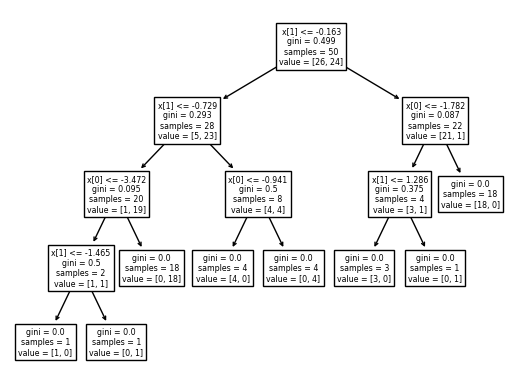

In [49]:
plot_tree(clf3)

In [50]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [51]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [52]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [53]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
96,-0.066827,2.723846,-1.766875,0.150110,-2.137123,0
47,-0.762818,-3.037399,0.795796,-2.614365,-1.343808,1
50,3.077694,-0.462243,1.692508,-1.751478,-0.580184,0
14,-0.715085,-0.273280,0.257626,-0.586928,0.263415,1
82,0.994044,0.251453,0.405339,-1.291252,0.430293,0
99,1.681325,0.360645,-0.773479,0.790907,-0.801037,0
85,-0.782357,-0.008775,0.395862,-0.407315,1.013989,1
23,0.717828,0.592071,1.179222,-1.203142,0.070719,0
54,2.387191,-0.627217,-0.419653,2.662498,0.009173,0
42,-1.027932,-0.754245,0.316390,-0.181510,-0.243556,1
